In [1]:
# Import necessary libraries

import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import HTML
import numpy as np
from PIL import Image, ImageEnhance

In [2]:
class ImageObject:
    def __init__(self, url):
        self.url = url
        response = requests.get(url)
        self.img = Image.open(BytesIO(response.content))
        self.og_size = self.img.size
    
    def show(self):
        imshow(np.asarray(self.img))

    def monochrome(self, scale=3, threshold=200):
        
        # convert image to monochrome
        image = self.img.convert('L')
        image_array = np.array(image)
        
        # Binarize a numpy array using threshold as cutoff
        for i in range(len(image_array)):
            for j in range(len(image_array[0])):
                if image_array[i][j] > threshold:
                    image_array[i][j] = 255
                else:
                    image_array[i][j] = 0
        
        image = Image.fromarray(image_array)
        
        # scale image down to reduce number of non-zero pixels
        img_sm = image.resize(tuple([int(v/scale) for v in image.size]),Image.ANTIALIAS)
        
        # convert image to black and white
        img_bw = img_sm.convert(mode='1', dither=2) 
        self.bw_img = img_bw
        self.pixels = (1 - np.asarray(img_bw).astype(int))
        self.pixels_flat = np.reshape(self.pixels, self.pixels.size)
    
    def show_bw(self):
        print("Dimensions: {}".format(self.bw_img.size))
        print("Num. pixels: {}".format(self.pixels.sum()))
        imshow(np.asarray(self.bw_img))
    
    def get_tour(self, starting_point="random", plot=True):
        # Get greedy tour through pixels
        
        absolute_index = np.where(self.pixels_flat > 0)[0] # positions of non-zero pixels
        relative_index = np.array(range(1, len(absolute_index)+1 ))
        
        # Replace each non-zero pixel in the array with its number
        # i.e., the 10th non-zero pixel will have 10 in its place
        flat_img_mod = deepcopy(self.pixels_flat)
        for rel, pix in enumerate(absolute_index):
            flat_img_mod[pix] = rel+1
        
        # Get coordiantes for each non-zero pixel
        img_idx = np.reshape(flat_img_mod, self.pixels.shape)
        self.coord_list = []
        for p1 in relative_index:
            p1_coords = tuple([int(c) for c in np.where(img_idx==p1)])
            self.coord_list.append(list(p1_coords))
        
        # Calcualte distance between each pair of coords
        dist_mat = distance.cdist(self.coord_list, self.coord_list, 'euclidean')

        # Initialize search space with nearest neighbor tour
        cities = self.coord_list
        num_cities = len(cities)
        if starting_point=="random":
            start = int(np.random.choice(range(num_cities),size=1))
        else:
            assert starting_point < num_cities
            start = starting_point
        tour = [start]
        active_city = start
        for step in range(0, num_cities):
            dist_row = deepcopy(dist_mat[active_city,:])
            for done in tour:
                dist_row[done] = np.inf
            nearest_neighbor = np.argmin(dist_row)
            if nearest_neighbor not in tour:
                tour.append(nearest_neighbor)
            active_city = nearest_neighbor

        y_tour = -np.array([cities[tour[i % num_cities]] for i in range(num_cities+1) ])[:,0]
        y_tour = y_tour - y_tour[0]#- min(y_tour)
        x_tour = np.array([cities[tour[i % num_cities]] for i in range(num_cities+1) ])[:,1]    
        x_tour = x_tour - x_tour[0]#- min(x_tour)

        # Circle tour back to beginning
        np.append(x_tour, x_tour[0])
        np.append(y_tour, y_tour[0])
        num_cities = num_cities + 1
    
        self.x_tour = x_tour
        self.y_tour = y_tour
        self.num_pixels = num_cities
        
        if plot:
            plt.plot(self.x_tour, self.y_tour)

In [1]:
# Secondary libraries

import requests
from io import BytesIO
from copy import deepcopy
from scipy.spatial import distance
from copy import deepcopy

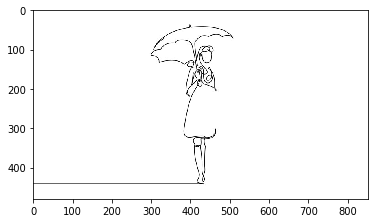

In [23]:
# Human Face
#url = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRNuD2ocLJC1zpr45o_mNH_WebCNOuONdBDIrn2G9KEGfmQx0lQ&usqp=CAU"

# Kingfisher
#url = "https://product-image.juniqe-production.juniqe.com/media/catalog/product/seo-cache/x800/676/14/676-14-101P/One-Line-Night-Bird-Quibe-Poster.jpg"

# Woman Holding Umbrella
url = "https://ak7.picdn.net/shutterstock/videos/1023853117/thumb/3.jpg"

img = ImageObject(url)
img.show()

Dimensions: (284, 160)
Num. pixels: 750


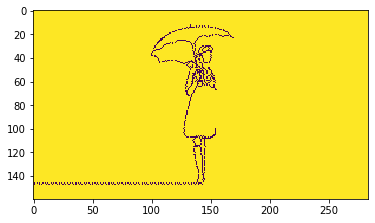

In [24]:
img.monochrome(scale=3, threshold=200)
img.show_bw()

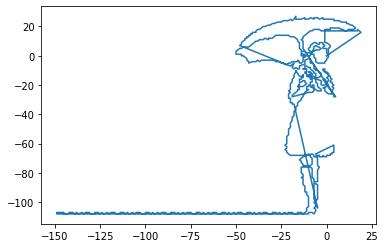

In [25]:
img.get_tour(starting_point=205) 

In [26]:
from celluloid import Camera

D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to rea

D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to rea

D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to rea

D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to rea

D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to rea

D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Python\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to rea

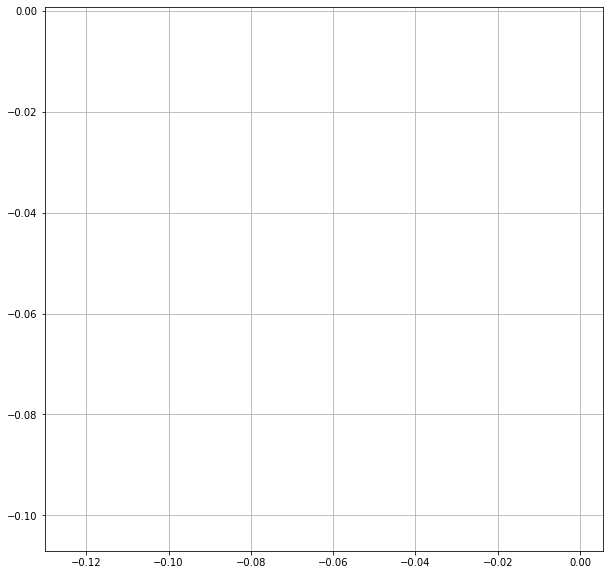

In [28]:
# Plotting and animating using celluloid

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
x = img.x_tour
y = img.y_tour
t = np.linspace(0, img.num_pixels, 264)
for i in range(301):
    Y = np.fft.fft(y)/len(y)
    X = np.fft.fft(x)/len(x)
    
    np.put(Y, range(i+1, len(y)), 0.0)
    np.put(X, range(i+1, len(x)), 0.0)
           
    ifft_y = np.fft.ifft(Y)
    ifft_x = np.fft.ifft(X)
           
    z = plt.plot(ifft_x,ifft_y,color='r')
    #plt.plot(x,y,color='k',linewidth=1.5)

    plt.legend(z, [f'n = {i}'], loc=3)
    plt.grid(True,axis='both')
    camera.snap()
    
animation = camera.animate(interval=(10**-8))
animation.save('fourier.gif')